<ipython-input-1-494580e8d27e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['year'] = filtered_data['fecha_vigencia'].dt.year
<ipython-input-1-494580e8d27e>:26: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df_grouped = filtered_data.groupby(['year']).max().reset_index()


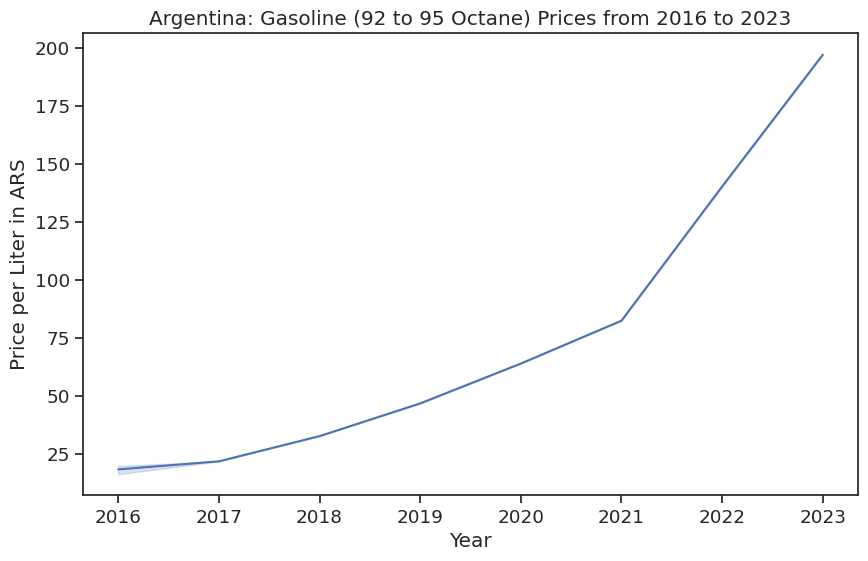

The predicted price for 2024 is: 2079.7957991679946


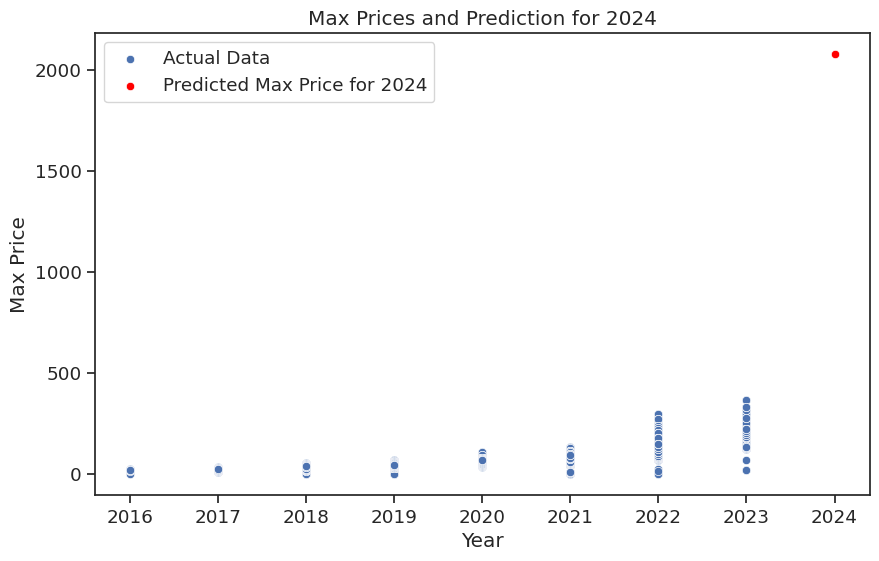

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Read the CSV file
df = pd.read_csv('http://datos.energia.gob.ar/dataset/1c181390-5045-475e-94dc-410429be4b17/resource/f8dda0d5-2a9f-4d34-b79b-4e63de3995df/download/precios-historicos.csv')

# Convert the "fecha_vigencia" column to datetime type, removing out-of-bounds timestamps
df['fecha_vigencia'] = pd.to_datetime(df['fecha_vigencia'], errors='coerce')
df = df[df['fecha_vigencia'].apply(lambda x: pd.Timestamp.min <= x <= pd.Timestamp.max)]

# Filter the df to include only dates from 2016 until 2023
filtered_data = df[(df['fecha_vigencia'].dt.year >= 2016) 
  & (df['fecha_vigencia'].dt.year <= 2023)
  & (df['precio'] >=0)
  & (df['precio'] <=500)]

# Extract the year into separate columns
filtered_data['year'] = filtered_data['fecha_vigencia'].dt.year

# Filter the DataFrame to include only rows where "idproducto" is 2
filtered_data = filtered_data[filtered_data['idproducto'] == 2]

# Group by year
df_grouped = filtered_data.groupby(['year']).max().reset_index()

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set(style='ticks', font_scale=1.2)

# Plot the line plot
sns.lineplot(data=filtered_data, x='year', y='precio')

# Set the x-axis ticks for each quarter
x_ticks = filtered_data['year'].unique().tolist()
plt.xticks(x_ticks)

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Price per Liter in ARS')

# Set the plot title
plt.title('Argentina: Gasoline (92 to 95 Octane) Prices from 2016 to 2023')

# Show the plot
plt.show()

# Prepare the data for the regression model
X = filtered_data['precio'].values.reshape(-1, 1)
y = filtered_data['year'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make a prediction for the year 2024
prediction = model.predict([[2024]])

print(f"The predicted price for 2024 is: {prediction[0]}")

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set(style='ticks', font_scale=1.2)

# Plot the actual data
sns.scatterplot(data=filtered_data, x='year', y='precio', label='Actual Data')

# Plot the predicted maximum price for 2024
sns.scatterplot(x=[2024], y=prediction, color='red', label='Predicted Max Price for 2024')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Max Price')

# Set the plot title
plt.title('Max Prices and Prediction for 2024')

# Show the legend
plt.legend()

# Show the plot
plt.show()